Note :  for the following part of the quesions, i have resized the image from 800x800 to 28x28 and converted it to grayscale as anything more than that was making our colab sessions freeze and terminate.

I did ask the professor about it, and he said it should be fine.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import io,color,transform
import os
from google.colab import drive
drive.mount('/content/drive')
folder_path = "/content/drive/MyDrive/AML/360 Rocks"
%cd {folder_path}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AML/360 Rocks


In [ ]:
%cd {folder_path}
# Load images from the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Load the images into a numpy array and convert to grayscale
images = []
categories = []
for image_file in image_files:
    img = io.imread(os.path.join(folder_path, image_file))
    img_gray = color.rgb2gray(img)  # Convert to grayscale
    img_resized = transform.resize(img_gray, (28,28), anti_aliasing=True)  #resized
    images.append(img_resized)
    # Extract category from the first letter in the filename
    category = image_file[0]
    categories.append(category)

# Convert the list of images to a 2D numpy array (num_images, num_pixels)
X = np.array(images)

# Flatten the array to 1D (num_images, num_pixels)
num_images, height, width = X.shape
X.shape

/content/drive/MyDrive/AML/HW3/Q1/360


(360, 28, 28)

In [ ]:
#split into dependent and independent features.
X_data = X.reshape(num_images,height*width)
y = categories
y_sample = ['red' if i=="I"  else 'green' if i == "M" else "blue" for i in y] # add colors for the plot

#### Question 3A :
PCA with 2 dimensions (1) Amount of Variance preserved with these 2 component(1)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_data)
cumulative_variance_explained = np.sum(pca.explained_variance_ratio_)
print(f"Variance explained by the first two principal components: {cumulative_variance_explained * 100:.2f}%")

Variance explained by the first two principal components: 45.71%


#### Question-3 B

Scatter Plots of Components with some Rock Images.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.08, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y_sample)
    import pandas as pd
    df = pd.DataFrame(X_normalized, columns=['PC1', 'PC2'])
    df['Category'] = categories
    colors = {'I': 'red', 'M': 'green', 'S': 'blue'}
    for category, colour in colors.items():
      subset = df[df['Category'] == category]
      plt.scatter(subset['PC1'], subset['PC2'], c=colour, label=category, alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
      closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
      if closest_distance > min_distance:
          neighbors = np.r_[neighbors, [image_coord]]
          if images is None:
              plt.text(image_coord[0], image_coord[1], str((y_sample[index])),
                        color=color,
                        fontdict={"weight": "bold", "size": 16})
          else:
              image = images[index].reshape(28, 28)
              imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),image_coord)
              ax.add_artist(imagebox)
    # Add labels and title
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.title('Scatter Plot with Categories')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()


Question 3B :
PCA :

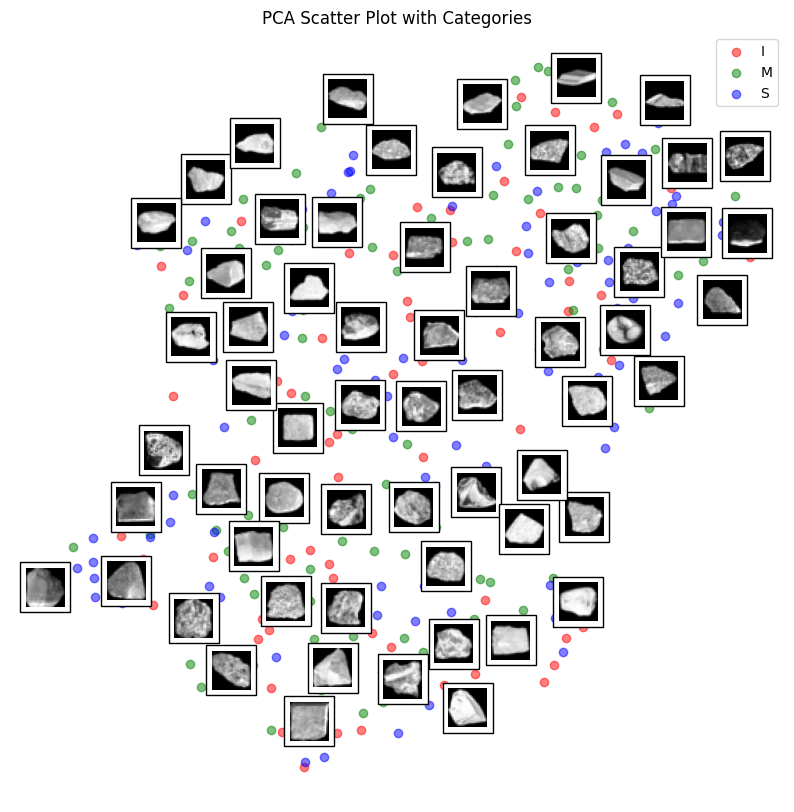

In [ ]:
plot_digits(X_reduced, y_sample, images=X_data, figsize=(10,10))

#### Question 3B:
A : T-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_reduced_tsne = tsne.fit_transform(X_data)
plt.show()

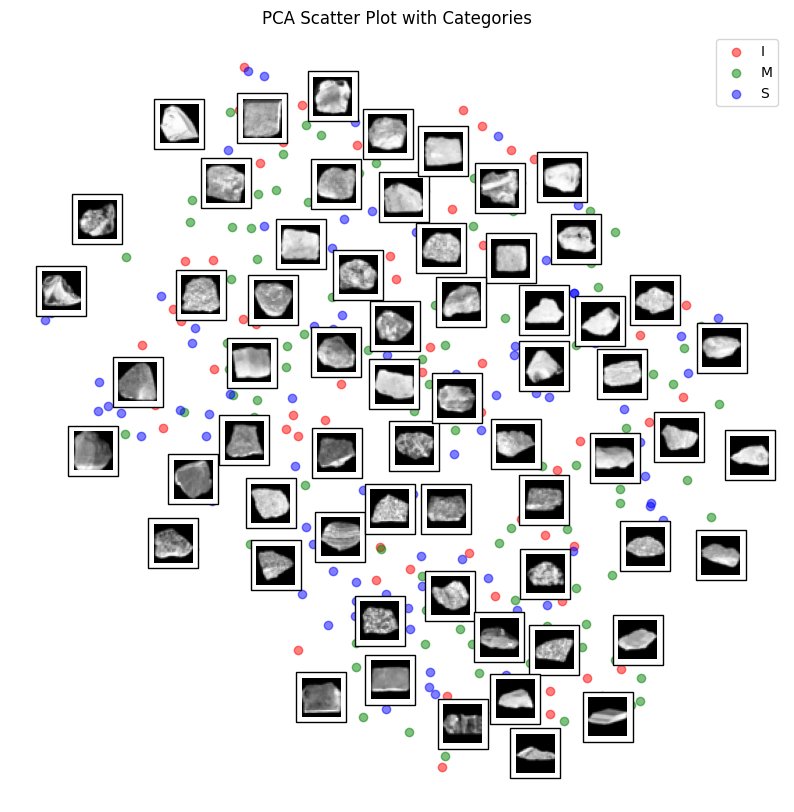

In [ ]:
plot_digits(X_reduced_tsne, y_sample, images=X_data, figsize=(10,10))

#### Question 3B:
B : LLE

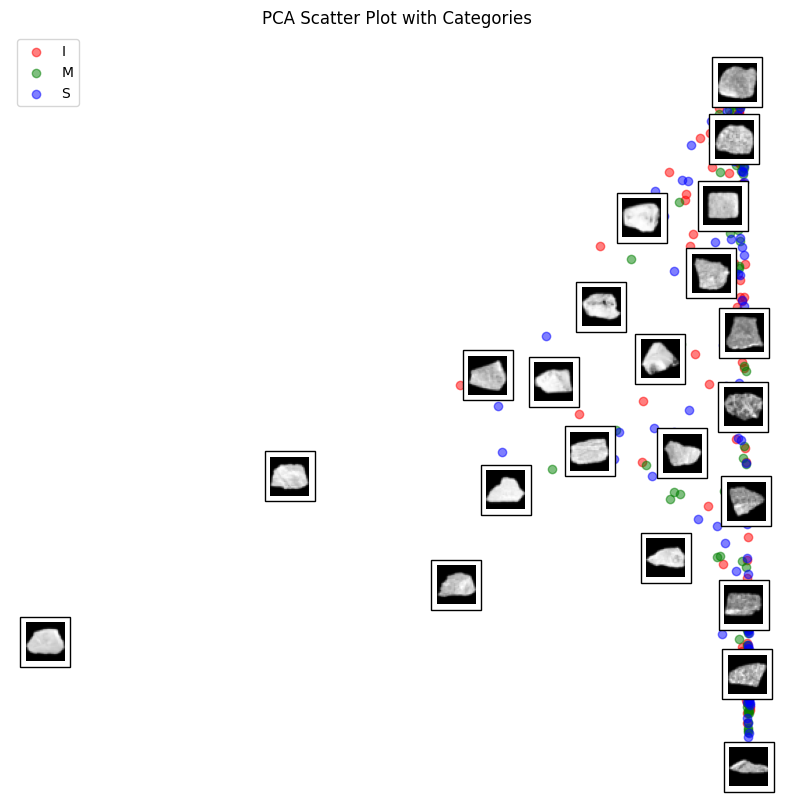

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2)
X_lle_reduced = lle.fit_transform(X_data)
plot_digits(X_lle_reduced, y_sample, images=X_data, figsize=(10,10))

#### Question 3B:
C : MDS

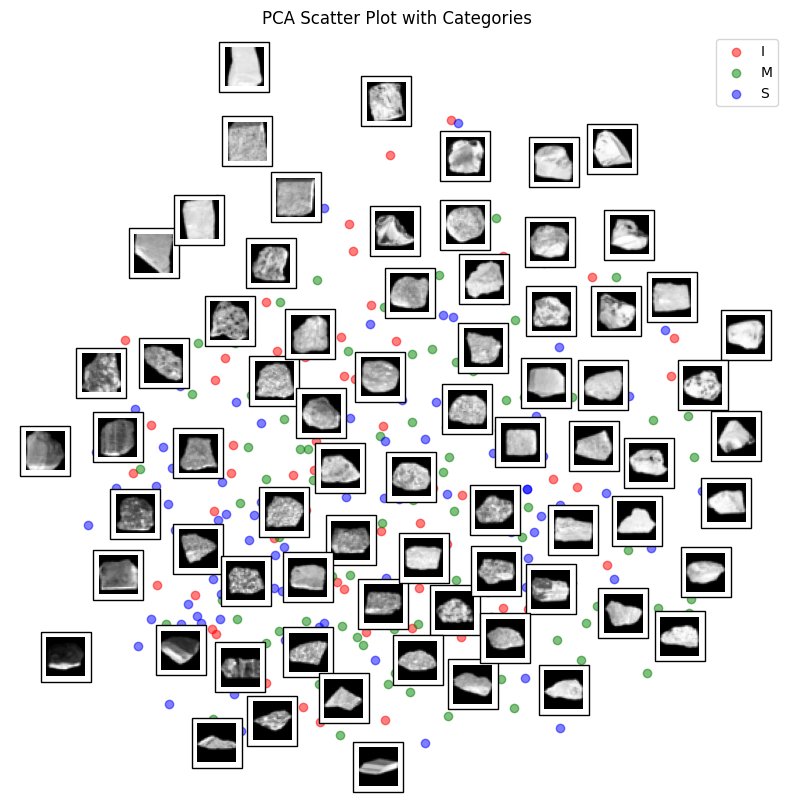

In [ ]:
from sklearn.manifold import MDS
X_mds_reduced = MDS(n_components=2,normalized_stress=False).fit_transform(X_data)
plot_digits(X_mds_reduced, y_sample,images=X_data, figsize=(10,10))
plt.show()

#### : Question 3 C - Discussion on the visualizations (preferred or not) (1)

All of the plots do have a lot of overlap. Perhaps more data would have helped us to identify these clusters.

PCA looks better when compared to other plots.




In [ ]:
#I dont prefer any visialization as everything is overlapped

### 4th : Now let's see if these dimensionality reduction techniques can give us similar features to those that humans use to judge the images. File mds_360.txt contains 8 features for each of the images (rankings are in the same order as the images in  '360 Rocks' folder. Run PCA, t-SNE, LLE and MDS to reduce the dimensionality of the images to 8. Then, compare those image embeddings with the ones from humans that are in the mds_360.txt file.

Note :  for the following part of the quesions, i have resized the image from 800x800 to 128x128 to fit the computations on my colab.


In [ ]:
%cd {folder_path}
# Load images from the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Load the images into a numpy array and convert to grayscale
images = []
categories = []
for image_file in image_files:
    img = io.imread(os.path.join(folder_path, image_file))
    #img_gray = color.rgb2gray(img)  # Convert to grayscale
    #img_resized = transform.resize(img_gray, (512,512), anti_aliasing=True)
    img_resized = transform.resize(img, (128,128), anti_aliasing=True)
    images.append(img_resized)
    # Extract category from the first letter in the filename
    category = image_file[0]
    categories.append(category)

# Convert the list of images to a 2D numpy array (num_images, num_pixels)
X = np.array(images)
print(X.shape)
# Flatten the array to 2D (num_images, num_pixels)
num_images, height, width, channels = X.shape
images_2d = X.reshape(num_images, height * width * channels)
scaler = StandardScaler()
images_standardized = scaler.fit_transform(images_2d)

In [ ]:
X_data =X.reshape(num_images,height*width*channels)

#### Question 4:
PCA with 8 components:

In [ ]:
#reduce to 8 components:
pca = PCA(n_components=8)
X_pca_reduced = pca.fit_transform(images_standardized)
matrix_with_pca_embeddings_data = X_pca_reduced

In [ ]:
file_path = "/content/drive/MyDrive/AML/HW3/Q1/mds_360.txt"
matrix_with_human_data = np.loadtxt(file_path)

In [ ]:
#perform the procrustes test
from scipy.spatial import procrustes
mtx1, mtx2, pca_disparity = procrustes(matrix_with_human_data, matrix_with_pca_embeddings_data)
correlation_matrix_pca = np.corrcoef(mtx1, mtx2)
pca_disparity

0.9792274808609364

In [ ]:
correlation_matrix = np.corrcoef(mtx1, mtx2, rowvar=False)
# Extract the correlation coefficients
correlation_coefficients = correlation_matrix[:mtx1.shape[1], mtx1.shape[1]:]
# Display the result
print("Correlation Coefficients between corresponding dimensions:")
import pandas as pd
pd.DataFrame(correlation_coefficients)

Correlation Coefficients between corresponding dimensions:


,0,1,2,3,4,5,6,7
0,0.153999,-0.012381,0.046431,-0.076552,-0.000744,0.021783,-0.062219,-0.030703
1,-0.010415,0.047970,-0.036824,0.038975,-0.010876,-0.012018,0.006813,0.012519
2,0.044701,-0.042145,0.095105,-0.050245,-0.019611,0.065091,0.025408,-0.022062
3,-0.075519,0.045708,-0.051486,0.205653,-0.021435,-0.060186,0.048386,0.019707
4,-0.000675,-0.011723,-0.018471,-0.019702,0.188745,-0.024215,0.020093,0.029572
5,0.027148,-0.017806,0.084264,-0.076037,-0.033284,0.137219,0.053382,0.071563
6,-0.076828,0.010002,0.032588,0.060564,0.027362,0.052888,0.130636,0.080260
7,-0.029464,0.014282,-0.021991,0.019170,0.031297,0.055102,0.062375,0.221382


#### Question 4:

t-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=8,method='exact')
matrix_with_tsne_embeddings_data = tsne.fit_transform(images_standardized)
mtx1, mtx2, tsne_disparity = procrustes(matrix_with_human_data, matrix_with_tsne_embeddings_data)
tsne_disparity

0.9836681058554037

In [ ]:
correlation_matrix = np.corrcoef(mtx1, mtx2, rowvar=False)
# Extract the correlation coefficients
correlation_coefficient = correlation_matrix[:mtx1.shape[1], mtx1.shape[1]:]
# Display the result
print("Correlation Coefficients between corresponding dimensions: t-SNE")
pd.DataFrame(correlation_coefficient)

Correlation Coefficients between corresponding dimensions: t-SNE


,0,1,2,3,4,5,6,7
0,0.153999,-0.012381,0.046431,-0.076552,-0.000744,0.021783,-0.062219,-0.030703
1,-0.010415,0.047970,-0.036824,0.038975,-0.010876,-0.012018,0.006813,0.012519
2,0.044701,-0.042145,0.095105,-0.050245,-0.019611,0.065091,0.025408,-0.022062
3,-0.075519,0.045708,-0.051486,0.205653,-0.021435,-0.060186,0.048386,0.019707
4,-0.000675,-0.011723,-0.018471,-0.019702,0.188745,-0.024215,0.020093,0.029572
5,0.027148,-0.017806,0.084264,-0.076037,-0.033284,0.137219,0.053382,0.071563
6,-0.076828,0.010002,0.032588,0.060564,0.027362,0.052888,0.130636,0.080260
7,-0.029464,0.014282,-0.021991,0.019170,0.031297,0.055102,0.062375,0.221382


#### Question 4:

LLE:

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=8)
matrix_with_lle_embeddings_data = lle.fit_transform(images_standardized)
mtx1, mtx2, lle_disparity = procrustes(matrix_with_human_data, matrix_with_lle_embeddings_data)
lle_disparity


0.9801696615862322

In [ ]:
correlation_matrix = np.corrcoef(mtx1, mtx2, rowvar=False)
# Extract the correlation coefficients
correlation_coefficient_lle = correlation_matrix[:mtx1.shape[1], mtx1.shape[1]:]
# Display the result
print("Correlation Coefficients between corresponding dimensions: t-SNE")
pd.DataFrame(correlation_coefficient_lle)

Correlation Coefficients between corresponding dimensions: t-SNE


,0,1,2,3,4,5,6,7
0,0.142101,0.013764,0.031324,-0.044334,0.041790,-0.010191,-0.009199,-0.032587
1,0.014823,0.107643,-0.010799,0.028362,0.040605,0.032150,0.018183,-0.023357
2,0.042105,-0.013479,0.088020,-0.047428,0.017336,0.049692,0.021854,-0.011242
3,-0.048481,0.028798,-0.038584,0.152423,-0.015590,0.002433,-0.011964,0.003115
4,0.055339,0.049928,0.017079,-0.018879,0.188806,-0.023902,-0.019499,0.039231
5,-0.010696,0.031333,0.038802,0.002335,-0.018945,0.156760,-0.026211,0.014327
6,-0.012957,0.023779,0.022899,-0.015410,-0.020739,-0.035172,0.145838,0.023297
7,-0.046705,-0.031084,-0.011987,0.004082,0.042461,0.019563,0.023707,0.158035


#### Question 4:

MDS:

In [ ]:
from sklearn.manifold import MDS
matrix_with_mds_embeddings_data = MDS(n_components=8,normalized_stress=False).fit_transform(X_data)
mtx1, mtx2, mds_disparity = procrustes(matrix_with_human_data, matrix_with_mds_embeddings_data)
mds_disparity

0.9789384991615805

In [ ]:
correlation_matrix = np.corrcoef(mtx1, mtx2, rowvar=False)
# Extract the correlation coefficients
correlation_coefficient = correlation_matrix[:mtx1.shape[1], mtx1.shape[1]:]
# Display the result
print("Correlation Coefficients between corresponding dimensions: t-SNE")
pd.DataFrame(correlation_coefficient)

Correlation Coefficients between corresponding dimensions: t-SNE


,0,1,2,3,4,5,6,7
0,0.160685,0.020231,0.013026,-0.073962,-0.007740,0.009602,-0.052312,-0.022705
1,0.018659,0.099399,-0.000136,0.060899,-0.010155,-0.007225,0.025085,-0.002465
2,0.015866,-0.000180,0.100867,-0.040101,-0.026450,0.073564,0.011264,-0.031681
3,-0.091684,0.081850,-0.040811,0.148299,-0.010180,-0.055236,0.020534,0.012444
4,-0.009276,-0.013194,-0.026022,-0.009841,0.222574,-0.019807,-0.009596,0.041698
5,0.013010,-0.010613,0.081831,-0.060374,-0.022395,0.137645,0.057066,0.042802
6,-0.082164,0.042718,0.014525,0.026018,-0.012578,0.066151,0.138906,0.033673
7,-0.032388,-0.003812,-0.037101,0.014320,0.049636,0.045061,0.030582,0.176675


#### Final Disparity Table for all techniques:

In [ ]:
disparity = [[pca_disparity,"PCA"],[tsne_disparity,"TSNE"],[lle_disparity,"LLE"],[mds_disparity,"MDS"]]
import pandas as pd
disparity_df = pd.DataFrame(disparity,columns=["Disparity scores","Method"])
disparity_df

,Disparity scores,Method
0,0.979227,PCA
1,0.983668,TSNE
2,0.980170,LLE
3,0.978938,MDS


# Question 5a:

### To speed up the algorithm, use PCA to reduce the dimensionality of the dataset to two. Determine the number of clusters using one of the techniques we discussed in class.

In [10]:

%cd {folder_path}
# Load images from the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Load the images into a numpy array and convert to grayscale
images = []
categories = []
labels=[]
for image_file in image_files:
    img = io.imread(os.path.join(folder_path, image_file))
    img_gray = color.rgb2gray(img)  # Convert to grayscale
    images.append(img_gray)
    category = image_file[0]
    categories.append(category)
    category = image_file[0]
    if category == 'I':
      labels.append(0)
    elif category == 'M':
      labels.append(1)
    elif category == 'S':
       labels.append(2)
# Convert the list of images to a 2D numpy array (num_images, num_pixels)
images_array = np.array(images)

# Flatten the array to 1D (num_images, num_pixels)
num_images, height, width = images_array.shape
images_1d = images_array.reshape(num_images, height * width)

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
images_standardized = scaler.fit_transform(images_1d)

/content/drive/MyDrive/AML/360 Rocks


In [11]:
# Apply PCA with 2 components
n_components = 2
pca = PCA(n_components=n_components)
images_pca = pca.fit_transform(images_standardized)

# Print the cumulative explained variance
cumulative_variance_explained = np.sum(pca.explained_variance_ratio_)
print(f"Variance explained by the first two principal components: {cumulative_variance_explained * 100:.2f}%")

Variance explained by the first two principal components: 30.85%


Find number of cluster using Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

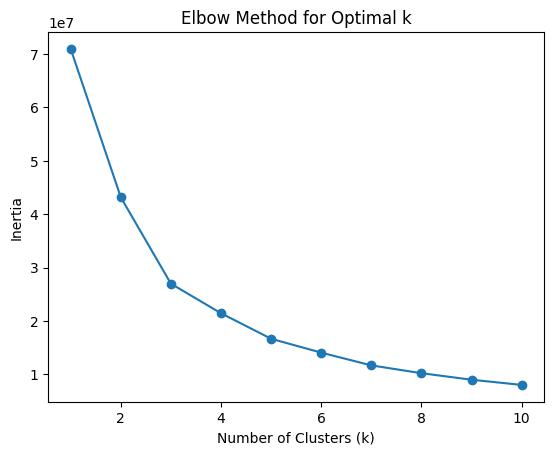

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different values of k
k_values = range(1, 11)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(images_pca)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

As we can see for k=3 we will mostly get good results in clustering

Q 5b) Visualize the clusters in a similar way to the visualization in the ipynb file with points of each cluster uniquely labelled

In [13]:
optimal_k = 3 # the optimal number of clusters from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(images_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


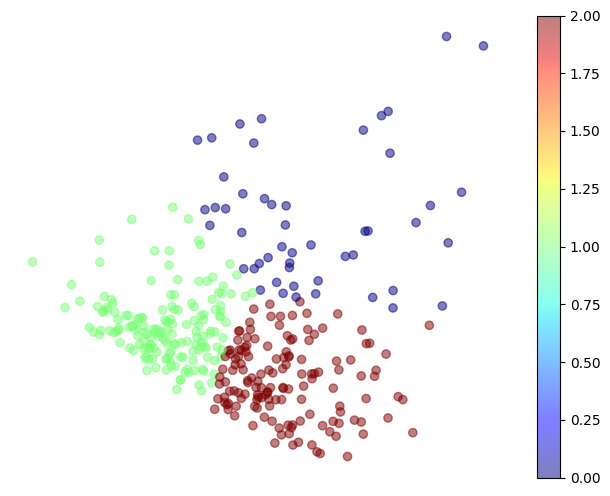

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(images_pca[:,0], images_pca[:, 1],
            c=clusters, cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


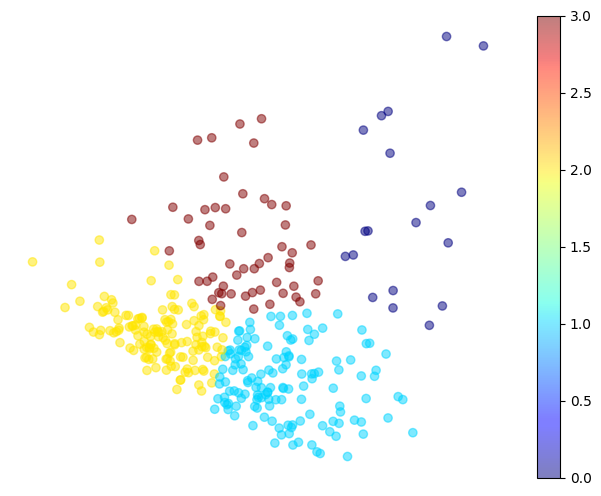

In [15]:
#plot a 2d cluster
optimal_k = 4
kmeans2 = KMeans(n_clusters=optimal_k, init="random", random_state=42)
clusters = kmeans2.fit_predict(images_pca)
plt.figure(figsize=(8, 6))
plt.scatter(images_pca[:,0], images_pca[:, 1],
            c=clusters, cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

Q 5b) Visualize the clusters in a similar way to the visualization in the ipynb file with points of each cluster uniquely labelled

In [16]:
def plot_data(X):
  plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
  if weights is not None:
    centroids = centroids[weights > weights.max() / 10]
  plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
  plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
def plot_decision_boundaries(clusterer, labels, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
  mins = X.min(axis=0) - 0.1
  maxs = X.max(axis=0) + 0.1
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
  Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
  plt.scatter(X[:, 0], X[:, 1], c=[label for label in labels],
              cmap='viridis', edgecolors='k', marker='o', s=50, alpha=0.7)
  if show_centroids:
    plot_centroids(clusterer.cluster_centers_)
  if show_xlabels:
    plt.xlabel("$x_1$")
  else:
    plt.tick_params(labelbottom=False)
  if show_ylabels:
    plt.ylabel("$x_2$", rotation=0)
  else:
    plt.tick_params(labelleft=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


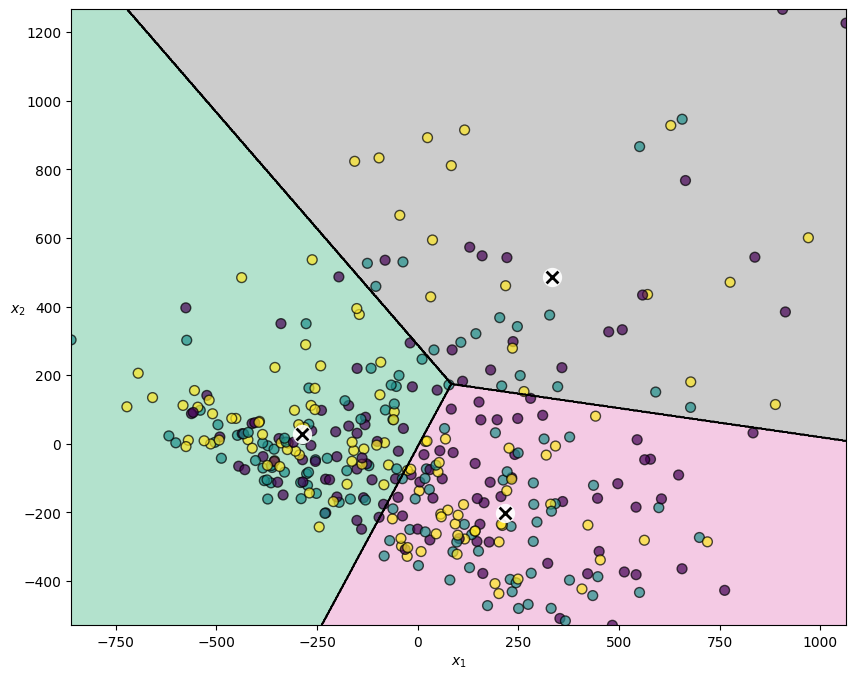

In [17]:
optimal_k = 3
kmeans3 = KMeans(n_clusters=optimal_k, init="random", random_state=42)
clusters = kmeans3.fit_predict(images_pca)
plt.figure(figsize=(10, 8))
plot_decision_boundaries(kmeans3, labels, images_pca)
plt.show()

### Q6:
##### A: Number of clusters and EM  implementation

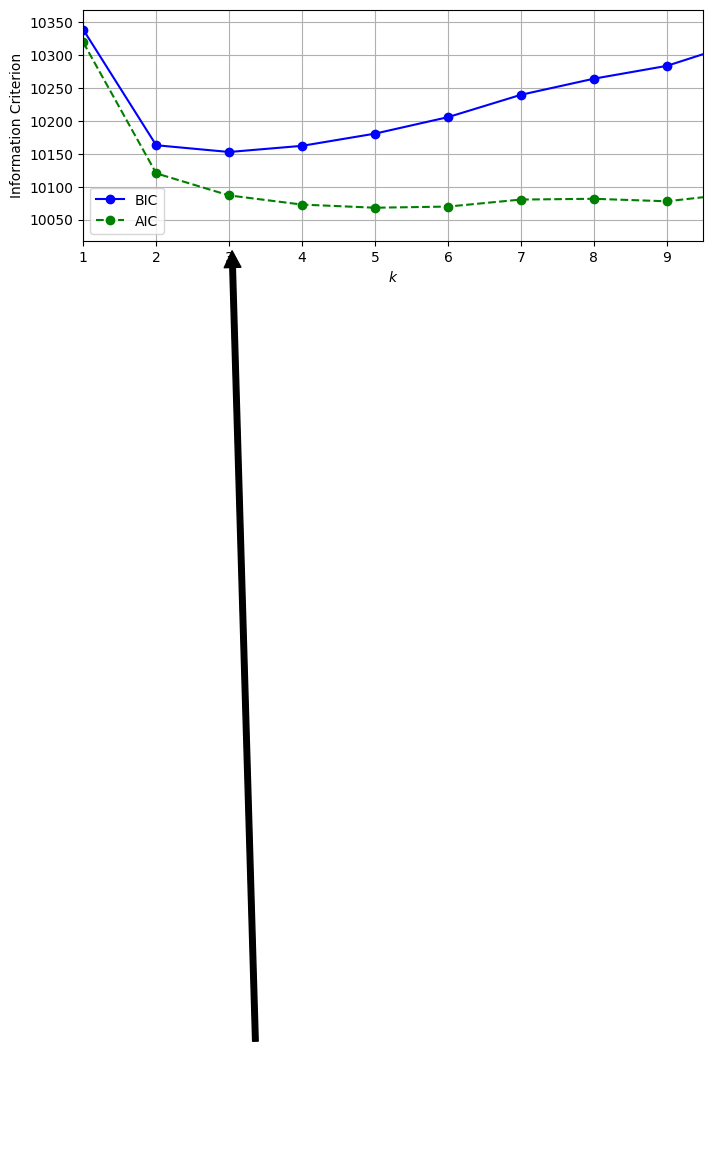

In [19]:
from sklearn.mixture import GaussianMixture

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(images_pca)
             for k in range(1, 11)]
bics = [model.bic(images_pca) for model in gms_per_k]
aics = [model.aic(images_pca) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.annotate("", xy=(3, bics[2]), xytext=(3.4, 8650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.legend()
plt.grid()
plt.show()

Upon applying the Bayesian Information Criterion (BIC) to the Expectation-Maximization (EM) algorithm with Principal Component Analysis (PCA) dimensionality reduction, we observed that the BIC scores were minimized when the number of clusters = 3. This implies that, based on the balance between model fit and complexity, the most suitable configuration for clustering was achieved with three clusters.

In [ ]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
y_pred=gm.fit(images_pca)
gm.weights_

array([0.20934661, 0.46931359, 0.3213398 ])

In [ ]:
gm.means_

array([[ 55.51656056, 100.74265172],
       [ 34.55990284, -31.3653715 ],
       [-86.6423501 , -19.82305863]])

In [ ]:
#Did the algorithm actually converge?
gm.converged_

True

In [ ]:
#How many iterations did it take?
gm.n_iter_

21

Let's predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster.

In [ ]:
gm.predict(images_pca)

array([1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 1, 0, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 2,
       1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0,
       1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2,

In [ ]:
gm.predict_proba(images_pca).round(3)

array([[0.03 , 0.841, 0.13 ],
       [0.045, 0.917, 0.038],
       [0.064, 0.932, 0.004],
       ...,
       [0.034, 0.047, 0.919],
       [0.041, 0.03 , 0.929],
       [0.102, 0.893, 0.005]])

### 6 B)Visualize the clusters

In [20]:
optimal_components = 3 #define optimal component
gmm1 = GaussianMixture(n_components=optimal_components, random_state=42)
clusters = gmm1.fit_predict(images_pca)

In [21]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
  if weights is not None:
    centroids = centroids[weights > weights.max() / 10]
  plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
  plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

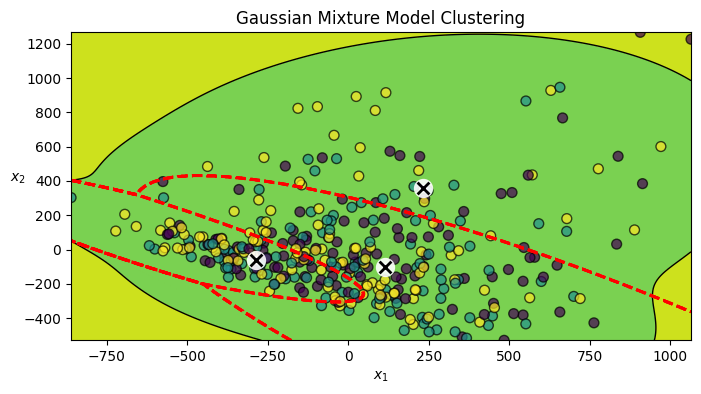

In [22]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

def plot_gaussian_mixture(clusterer, X, labels, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.scatter(X[:, 0], X[:, 1], c=labels,
                cmap='viridis', edgecolors='k', marker='o', s=50, alpha=0.7)

    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


# Assuming y_pred_gm contains the cluster labels
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
y_pred_gm = gm.fit_predict(images_pca)

plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, images_pca, labels, resolution=1000)
plt.title("Gaussian Mixture Model Clustering")
plt.show()


C) Use the model to generate 20 new rocks

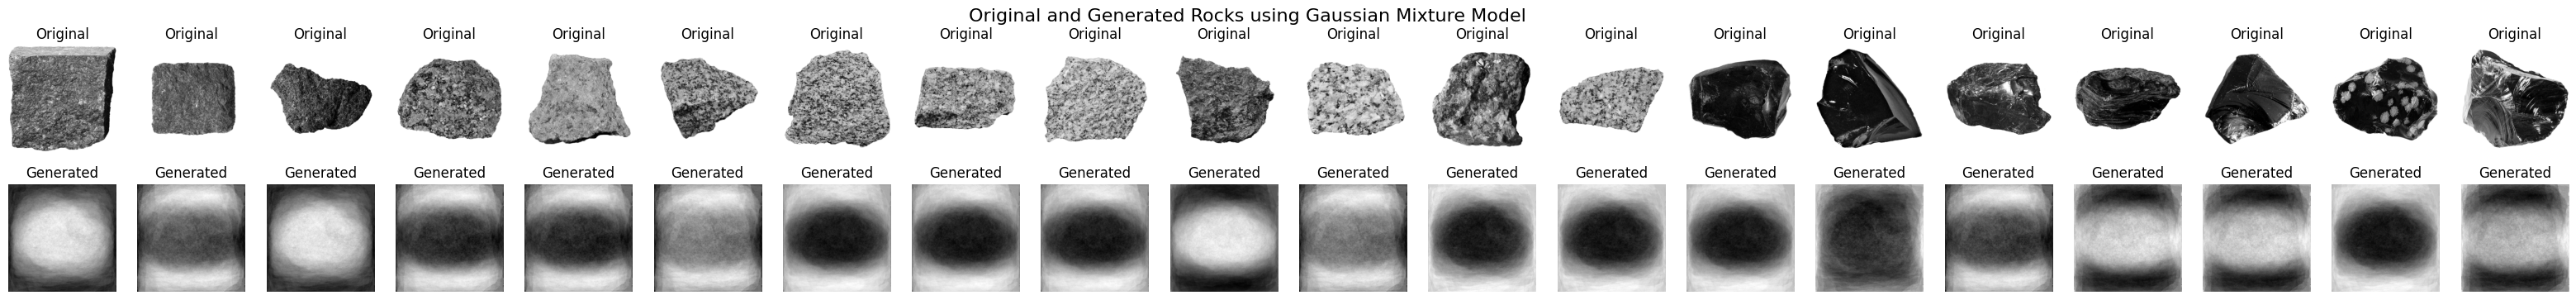

In [23]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)
y_pred = gm.fit_predict(images_pca)
n_gen_rocks = 20
gen_rocks_reduced, y_gen_rocks = gm.sample(n_samples=n_gen_rocks)
gen_rocks = pca.inverse_transform(gen_rocks_reduced)
gen_rocks = gen_rocks.reshape(20,800,800)


fig, axes = plt.subplots(2, n_gen_rocks, figsize=(2 * n_gen_rocks, 4))

for i in range(n_gen_rocks):
    # Plot Original Rocks
    axes[0, i].imshow(images[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    # Plot Generated Rocks
    axes[1, i].imshow(gen_rocks[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Generated')

plt.suptitle('Original and Generated Rocks using Gaussian Mixture Model', fontsize=16)
plt.show()
